In [1]:
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda x: np.sin(x)
interp_region = (-5,5)
n_train = 50

x = np.linspace(interp_region[0],interp_region[1])
x_train = np.sort(np.random.uniform(interp_region[0],interp_region[1],n_train))
y_train = f(x_train)
f_spline = UnivariateSpline(x_train,y_train, s=0)

C:\Users\MBBar\AppData\Local\Temp/ipykernel_10856/53410913.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


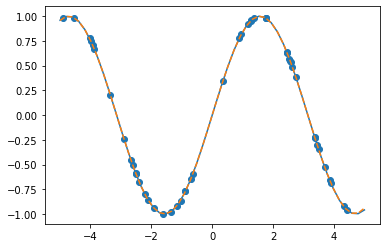

In [4]:
fig,ax=plt.subplots()
ax.plot(x,f(x), label = 'true sin(x)')
ax.scatter(x_train,y_train, label = 'train')
ax.plot(x,f_spline(x), ls='--', label = 'test')
fig.show()

**Pice wise interpolation**

In [5]:
class PicewiseUnivariateSpline(UnivariateSpline):
    def __init__(self, x: np.array, y: np.array, s: float = None, disc: np.array = None):
        self.disc = np.atleast_1d(disc)
        break_points = np.searchsorted(x,disc)
        x_pice_wise = [x[i:j] for i,j in zip(np.append(0,break_points), np.append(break_points,len(x)))]
        y_pice_wise = [y[i:j] for i,j in zip(np.append(0,break_points), np.append(break_points,len(x)))]
        self.list = [UnivariateSpline(ix, iy ,s = s) for ix, iy in zip(x_pice_wise,y_pice_wise)]
    
    def __call__(self,x):
        x = np.atleast_1d(x)
        return [self.list[np.searchsorted(self.disc,ix)](ix) for ix in x]

In [6]:
f = lambda x: np.abs(x)
interp_region = (-5,5)
n_train = 12

x = np.linspace(interp_region[0],interp_region[1],1000)
x_train = np.sort(np.random.uniform(interp_region[0],interp_region[1],n_train))
y_train = f(x_train)
f_spline = PicewiseUnivariateSpline(x_train,y_train, s=0, disc = 0)

C:\Users\MBBar\AppData\Local\Temp/ipykernel_10856/666761029.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


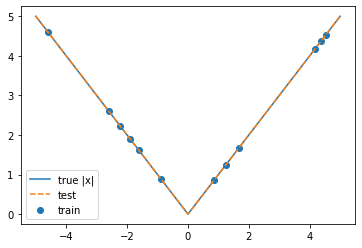

In [7]:
fig,ax=plt.subplots()
ax.plot(x,f(x), label = 'true |x|')
ax.scatter(x_train,y_train, label = 'train')
ax.plot(x,f_spline(x), ls='--', label = 'test')
ax.legend()
fig.show()

In [ ]:
class PicewiseUnivariateSpline(UnivariateSpline):
    def __init__(self, x: np.array, y: np.array, s: float = None, disc: np.array = None):
        self.disc = np.atleast_1d(disc)
        break_points = np.searchsorted(x,disc)
       
        self.list = [UnivariateSpline(ix, iy ,s = s) for ix, iy in zip(x_pice_wise,y_pice_wise)]
    
    def __call__(self,x):
        x = np.atleast_1d(x)
        return [self.list[np.searchsorted(self.disc,ix)](ix) for ix in x]

In [ ]:
UnivariateSpline(ix, iy ,s = s)

In [ ]:
class Interpolator():
    def __init__(self,x, y,s):
        self.x_1 = np.array(list(set(x[:,1])))
        for i in self.x_1:
            UnivariateSpline()

    def __call__(self,x):
        if np.any(x[:,1] not in self.x_1):
            raise ValueError
        

In [14]:
x_points = np.array([1,2,4,5,6,7])

x_test = np.array([2,4,5,1,2,3,5])

np.searchsorted(x_points,x_test)


array([1, 2, 3, 0, 1, 2, 3], dtype=int64)

In [18]:
l=['a','b','c','d','f','g']


TypeError: list indices must be integers or slices, not list

In [33]:
class Interpolator():
   def __init__(self, x: np.ndarray, y: np.array, s: float = None):
      y_points = np.array(list(set(x[:,1])))
      t_points = np.array(list(set(x[:,2])))
      for iy in y_points:
         for it in t_points:
            mask = (x[:,1]==iy)&(x[:,2]==it)
            UnivariateSpline(x[mask,0],y[mask])

In [37]:
w = np.linspace(1,2,100)
y = np.linspace(1,5,50)
t = np.arange(0,9)

In [38]:
np.meshgrid(w,y,t)

[array([[[1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.01010101, 1.01010101, 1.01010101, ..., 1.01010101,
          1.01010101, 1.01010101],
         [1.02020202, 1.02020202, 1.02020202, ..., 1.02020202,
          1.02020202, 1.02020202],
         ...,
         [1.97979798, 1.97979798, 1.97979798, ..., 1.97979798,
          1.97979798, 1.97979798],
         [1.98989899, 1.98989899, 1.98989899, ..., 1.98989899,
          1.98989899, 1.98989899],
         [2.        , 2.        , 2.        , ..., 2.        ,
          2.        , 2.        ]],
 
        [[1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.01010101, 1.01010101, 1.01010101, ..., 1.01010101,
          1.01010101, 1.01010101],
         [1.02020202, 1.02020202, 1.02020202, ..., 1.02020202,
          1.02020202, 1.02020202],
         ...,
         [1.97979798, 1.97979798, 1.97979798, ..., 1.97979798,
          1.97979798, 1.

In [35]:
Interpolator(x=np.array([[1,1,1],[1,1,2],[1,1,3],
                         [1,2,1],[1,2,2]]),
                         y=np.array([1,2,3,4,5]))

error: (m>k) failed for hidden m: fpcurf0:m=1

In [ ]:
x[(y_points==iy)&(t_points==it),0]

array([0.46715948, 0.60022248, 0.62425763, 0.64716392, 0.56980043,
       0.29872318, 0.02999944, 0.13220565, 0.69929501, 0.45374349])